# DESAFIO 2. Datos de Billboard

## Paso 4. Planteo del problema 

Ya tenés hecho el análisis exploratorio del dataset. Ahora es necesario realizar una formulación clara del problema que se va a abordar. Podés incorporar datos externos al dataset, si resultan necesarios para la resolución del problema formulado -solamente, acordate de poner un link a los mismos-. La creatividad es fundamental en este paso.

-------------------------------

*Extracto de Planteo 1*

--------------------

Debido  a las pocas fuentes  de información musical que además  no proveen una fácil y manejable visualización de datos y no tiene un estandarizado dataset existente para determinar la búsqueda del porque una canción es  popular , surgió la idea de direccionar estos problemas del data set de las canciones con mayor popularidad , a nuestro dataset que se basó en la fuente de popularidad del ranking billbord del 2000 y data de Spotify, un mapeo entre las características track, autor , álbum, fecha de entrado , fecha pico y  género así como identificación de las diferentes semanas  que lograron hacer la canción un hit, las semanas que salieron fuera del ranking y  relación entre tracks.   

De tal modo que la destreza para predecir la popularidad de los tracks es de gran importancia para las empresas discográficas, el presente trabajo se enfoca en las características que hacen que las canciones tengan mayor probabilidad de ser popular, por lo tanto la industria de la música  con el objetivo de obtener el máximo beneficio, podría beneficiarse seleccionando las canciones más prometedoras para su publicación ,y dado que las predicciones de popularidad pueden atribuirse a un perfil específico la experimentación del presente trabajo se basa principalmente en las pruebas de efectividad para encontrar un hit musical, donde se busca predecir la popularidad de los tracks.
Nuestro objetivo es proveer un fácil uso de un data set que nos permita solucionar:
"	Direccionar los problemas de identificación de las características de un track que apoyen la separación entre lo no popular y lo popular en un ambiente contralo es decir donde no existan las variables de marketing donde estas pueden incrementar la posición de un canción en un ranking.
"	Examinar la habilidad para aprender desde un perfil de un track popular y predecir la popularidad de otros tracks.


Una serie características son las que describen la popularidad de una pista musical 
Cada canción de consideración "K" logra "n" posiciones de popularidad "p", donde cada posición "pi" es menor o igual a un umbral de densidad definido por la popularidad, para que"k" este en el top, ocurriendo cada "i" periodos de duración de tiempo. Toda consideración tiene lugar dentro de un periodo de examinación "e" que incluye un número "j" de "i" periodos ( para periodos de examinación "e" es igual a semanas y top de popularidad "i" PERIODOS  igual a 2 semanas luego "j"es igual a 26 )

1- **Mejor posición** .- la mejor posición del track para el periodo aparece en la  lista,bestpo=min(P)

2- **Peor posición**  la pero posición del track para el periodo aparece en la  lista, worstpos=max(P)

3- **Posición de entrada** la posición del track donde por primera vez aparece en la lista, enterpos=p1.

4- **Semanas en posición** el número de semanas del track que aparecen en la lista, weekson=1 

5- **Semanas fuera de posición** el número de semanas, dentro de un periodo donde aparece en el top y luego el track está por debajo del límite de popularidad (fuera del top), weeksoff=j-weekson. 

6- **Posición de salida**  la posición del track en la última semana antes de dejar por siempre el top 

7- **Promedio de posición** el promedio de la posición del track para todas las semanas que aparecion en el top de la lista.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np

# Cargamos la base

wide = pd.read_csv('df2.2.1.csv', encoding = 'utf8', index_col= False)
long = pd.read_csv('df2.2.2.csv', encoding = 'utf8', index_col= False)

**1- Mejor posición**

In [2]:
long.head()

cancion    nombre_artistico tiempo genero  \
0               independent women part i     destiny's child   3:38   rock   
1                           maria, maria             santana   4:18   rock   
2                     i knew i loved you       savage garden   4:07   rock   
3                                  music             madonna   3:45   rock   
4  come on over baby (all i want is you)  christina aguilera   3:38   rock   

  fecha_entrada fecha_punto_maximo  ranking  num_semana  
0    2000-09-23         2000-11-18       78           1  
1    2000-02-12         2000-04-08       15           1  
2    1999-10-23         2000-01-29       71           1  
3    2000-08-12         2000-09-16       41           1  
4    2000-08-05         2000-10-14       57           1

In [3]:
good = long[['cancion','nombre_artistico','ranking']][(long['ranking'] != 0)].sort_values(by=['ranking']).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

good.rename(columns={'ranking':'mejor_pos'}, inplace=True)

billboard01 = pd.merge(wide, good, on=['cancion','nombre_artistico'], how='outer')

**2- Peor posición**

In [4]:
bad = long[['cancion','nombre_artistico','ranking']][(long['ranking'] != 0)].sort_values(by=['ranking'],ascending=False).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

bad.rename(columns={'ranking':'peor_pos'}, inplace=True)

billboard02 = pd.merge(billboard01, bad, on=['cancion','nombre_artistico'], how='outer')

**3- Posición de entrada**

In [5]:
billboard02.rename(columns={'x1st.week':'pos_entrada'}, inplace=True)
billboard02.head()

cancion tiempo genero fecha_entrada  \
0               independent women part i   3:38   rock    2000-09-23   
1                           maria, maria   4:18   rock    2000-02-12   
2                     i knew i loved you   4:07   rock    1999-10-23   
3                                  music   3:45   rock    2000-08-12   
4  come on over baby (all i want is you)   3:38   rock    2000-08-05   

  fecha_punto_maximo  pos_entrada  x2nd.week  x3rd.week  x4th.week  x5th.week  \
0         2000-11-18           78       63.0       49.0       33.0       23.0   
1         2000-04-08           15        8.0        6.0        5.0        2.0   
2         2000-01-29           71       48.0       43.0       31.0       20.0   
3         2000-09-16           41       23.0       18.0       14.0        2.0   
4         2000-10-14           57       47.0       45.0       29.0       23.0   

     ...     x59th.week  x60th.week  x61st.week  x62nd.week  x63rd.week  \
0    ...            NaN         NaN         NaN         NaN         NaN   
1    ...            NaN         NaN         NaN         NaN         NaN   
2    ...            NaN         NaN         NaN         NaN         NaN   
3    ...            NaN         NaN         NaN         NaN         NaN   
4    ...            NaN         NaN         NaN         NaN         NaN   

   x64th.week  x65th.week    nombre_artistico  mejor_pos  peor_pos  
0         NaN         NaN     destiny's child          1        78  
1         NaN         NaN             santana          1        48  
2         NaN         NaN       savage garden          1        71  
3         NaN         NaN             madonna          1        44  
4         NaN         NaN  christina aguilera          1        57  

[5 rows x 73 columns]

**4- Semanas en posición** Se creará una variable que indique la cantidad de semanas en que una canción estuvo rankeada.

In [6]:
# Creo la variable de semanas de permanencia
long['sem_pos'] = long[(long['ranking'] != 0)].groupby(['cancion','nombre_artistico'])['num_semana'].transform('count')

# A los NaN de la variable permanencia la transformo en 0.
long['sem_pos'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
long['sem_pos'] = long['sem_pos'].astype(np.int64)

# Eliminamos los duplicados
sem_pos = long[['cancion','nombre_artistico','sem_pos']].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

billboard03 = pd.merge(billboard02, sem_pos, on=['cancion','nombre_artistico'], how='outer')

**5- Semanas fuera de posición ** Se creará una variable que indique que indique la cantidad de semanas que estuvo fuera del ranking, pero con la condición de que dicho tema haya vuelto a ser rankeado.

In [7]:
# Se creará primero una variable que indique la cantidad de semanas que aparece el tema sin tener en cuenta el bache.
long['permanencia'] = long[(long['ranking'] != 0)].groupby(['cancion','nombre_artistico'])['num_semana'].transform('max')

# A los NaN de la variable permanencia la transformo en 0.
long['permanencia'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
long['permanencia'] = long['permanencia'].astype(np.int64)



#######################################################################################################################
#######################################################################################################################


# Creo la variable de semanas de permanencia
long['sin_pos'] = long[(long['ranking'] != 0) & (long['permanencia'] != long['sem_pos'])].groupby(['cancion','nombre_artistico'])['num_semana'].transform('count')

# A los NaN de la variable permanencia la transformo en 0.
long['sin_pos'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
long['sin_pos'] = long['sin_pos'].astype(np.int64)

# Eliminamos los duplicados
sin_pos = long[['cancion','nombre_artistico','sin_pos']].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

billboard04 = pd.merge(billboard03, sin_pos, on=['cancion','nombre_artistico'], how='outer')

**6- Posición de salida ** 

In [8]:
salida = long[['cancion','nombre_artistico','ranking','num_semana']][(long['ranking'] != 0)].sort_values(by=['num_semana'],ascending=False).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

salida.rename(columns={'ranking':'pos_salida'}, inplace=True)
del salida['num_semana']
billboard05 = pd.merge(billboard04, salida, on=['cancion','nombre_artistico'], how='outer')

** 7- Promedio de posición **

In [9]:
# Creo la variable permanencia
long['prom_pos'] = long[(long['ranking'] != 0)].groupby(['cancion','nombre_artistico'])['ranking'].transform('mean')

# A los NaN de la variable permanencia la transformo en 0.
long['prom_pos'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
long['prom_pos'] = long['prom_pos'].astype(np.int64)

# Eliminamos los duplicados
long.drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

# Eliminamos los duplicados
prom_pos = long[['cancion','nombre_artistico','prom_pos']].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)

billboard06 = pd.merge(billboard05, prom_pos, on=['cancion','nombre_artistico'], how='outer')


** 8- Número de canciones ** Se creará una variable que indique la cantidad de canciones por artista.  

In [10]:
billboard06['num_canciones'] = billboard06.groupby(['nombre_artistico'])['pos_entrada'].transform('count').astype(np.int64)


**9- Estación en que entró el tema**

_______________

Se definirá como HIT, que se encuentre en el TOP 5 y que tenga una permanencia de más de 26 semanas.

In [11]:
billboard2000 = billboard06[['cancion','nombre_artistico','tiempo','genero',
                            'fecha_entrada','fecha_punto_maximo','pos_entrada',
                           'mejor_pos','peor_pos','sem_pos','sin_pos','pos_salida',
                            'prom_pos','num_canciones']]
billboard2000.head()

cancion    nombre_artistico tiempo genero  \
0               independent women part i     destiny's child   3:38   rock   
1                           maria, maria             santana   4:18   rock   
2                     i knew i loved you       savage garden   4:07   rock   
3                                  music             madonna   3:45   rock   
4  come on over baby (all i want is you)  christina aguilera   3:38   rock   

  fecha_entrada fecha_punto_maximo  pos_entrada  mejor_pos  peor_pos  sem_pos  \
0    2000-09-23         2000-11-18           78          1        78       28   
1    2000-02-12         2000-04-08           15          1        48       26   
2    1999-10-23         2000-01-29           71          1        71       33   
3    2000-08-12         2000-09-16           41          1        44       24   
4    2000-08-05         2000-10-14           57          1        57       21   

   sin_pos  pos_salida  prom_pos  num_canciones  
0        0          31        14              3  
1        0          47        10              1  
2        0          47        17              2  
3        0          44        13              2  
4        0          44        19              3

In [12]:
billboard2000_top5 = billboard2000[(billboard2000['mejor_pos'] != 0) & 
                       (billboard2000['mejor_pos'] < 6) & 
                                (billboard2000['sem_pos']>25)].sort_values(by=['mejor_pos']).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)


In [13]:
billboard2000_top5.reset_index(drop=True, inplace=True)
billboard2000_top5

cancion  nombre_artistico tiempo   genero  \
0            independent women part i   destiny's child   3:38     rock   
1                        maria, maria           santana   4:18     rock   
2                  i knew i loved you     savage garden   4:07     rock   
3                         say my name   destiny's child   4:31     rock   
4                          incomplete             sisqo   3:52     rock   
5                              amazed          lonestar   4:25  country   
6                 everything you want  vertical horizon   4:01     rock   
7                 with arms wide open             creed   3:52     rock   
8                           try again           aaliyah   4:03     rock   
9                                bent   matchbox twenty   4:12     rock   
10                     you sang to me      marc anthony   3:50    latin   
11               he wasn't man enough      toni braxton   4:21     rock   
12                     he loves u not             dream   3:43     rock   
13  case of the ex (whatcha gonna do)               mya   3:50     rock   
14                            breathe        faith hill   4:04      rap   
15                    jumpin' jumpin'   destiny's child   3:48     rock   
16                         kryptonite      3 doors down   3:53     rock   
17                         thong song             sisqo   4:05     rock   
18               my love is your love   whitney houston   4:16     rock   
19                       i wanna know               joe   4:57     rock   
20                   get it on tonite    montell jordan   4:34      rap   
21                         most girls              pink   4:06     rock   
22                 bring it all to me            blaque   3:46      pop   
23                              i try         macy gray   3:52     rock   
24                 this i promise you            n'sync   4:23     rock   
25                            no more         ruff endz   3:56     rock   

   fecha_entrada fecha_punto_maximo  pos_entrada  mejor_pos  peor_pos  \
0     2000-09-23         2000-11-18           78          1        78   
1     2000-02-12         2000-04-08           15          1        48   
2     1999-10-23         2000-01-29           71          1        71   
3     1999-12-25         2000-03-18           83          1        83   
4     2000-06-24         2000-08-12           77          1        77   
5     1999-06-05         2000-03-04           81          1        81   
6     2000-01-22         2000-07-15           70          1        70   
7     2000-05-13         2000-11-11           84          1        86   
8     2000-03-18         2000-06-17           59          1        59   
9     2000-04-29         2000-07-22           60          1        60   
10    2000-02-26         2000-06-03           77          2        77   
11    2000-03-18         2000-05-06           63          2        63   
12    2000-09-30         2000-12-30           99          2        99   
13    2000-08-19         2000-12-02           72          2        72   
14    1999-11-06         2000-04-22           81          2        81   
15    2000-05-13         2000-08-19           74          3        74   
16    2000-04-08         2000-11-11           81          3        81   
17    2000-01-29         2000-05-20           74          3        74   
18    1999-09-04         2000-01-08           81          4        81   
19    2000-01-01         2000-07-01           94          4        94   
20    1999-10-23         2000-02-12           92          4        92   
21    2000-08-12         2000-11-25           85          4        85   
22    1999-10-23         2000-01-22           73          5        73   
23    2000-02-19         2000-05-20           68          5        68   
24    2000-09-30         2000-12-02           68          5        68   
25    2000-07-01         2000-09-02           76          5        76   

    sem_pos  sin_pos  pos_salida

**Creamos la base en csv de los HIT**

In [14]:
billboard2000_top5.to_csv('billboard2000_top5.csv', index = False) # Guardamos la base en .csv
billboard2000_top5.head()

cancion nombre_artistico tiempo genero fecha_entrada  \
0  independent women part i  destiny's child   3:38   rock    2000-09-23   
1              maria, maria          santana   4:18   rock    2000-02-12   
2        i knew i loved you    savage garden   4:07   rock    1999-10-23   
3               say my name  destiny's child   4:31   rock    1999-12-25   
4                incomplete            sisqo   3:52   rock    2000-06-24   

  fecha_punto_maximo  pos_entrada  mejor_pos  peor_pos  sem_pos  sin_pos  \
0         2000-11-18           78          1        78       28        0   
1         2000-04-08           15          1        48       26        0   
2         2000-01-29           71          1        71       33        0   
3         2000-03-18           83          1        83       32        0   
4         2000-08-12           77          1        77       26        0   

   pos_salida  prom_pos  num_canciones  
0          31        14              3  
1          47        10              1  
2          47        17              2  
3          47        20              3  
4          46        24              3

Vamos a generar las peores en cuanto al concepto que pusimos de HIT.

In [15]:
billboard2000_BAD = billboard2000[(billboard2000['mejor_pos'] != 0) & 
                       (billboard2000['mejor_pos'] > 94) & 
                                (billboard2000['sem_pos']<25)].sort_values(by=['mejor_pos']).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)



In [16]:
billboard2000_BAD.count()

cancion               14
nombre_artistico      14
tiempo                14
genero                14
fecha_entrada         14
fecha_punto_maximo    14
pos_entrada           14
mejor_pos             14
peor_pos              14
sem_pos               14
sin_pos               14
pos_salida            14
prom_pos              14
num_canciones         14
dtype: int64

**Creamos la base en csv de los BAD**

In [17]:
billboard2000_BAD.to_csv('billboard2000_BAD.csv', index = False) # Guardamos la base en .csv
billboard2000_BAD.head()

cancion nombre_artistico tiempo genero fecha_entrada  \
303             ta da          lil' mo   4:17    rap    2000-08-12   
304     dancing queen          a*teens   3:44    pop    2000-07-08   
305  where i wanna be     shade sheist   4:16    rap    2000-11-11   
306         all good?       de la soul   5:02    rap    2000-12-23   
307            get up    amel larrieux   4:02    r&b    2000-03-04   

    fecha_punto_maximo  pos_entrada  mejor_pos  peor_pos  sem_pos  sin_pos  \
303         2000-09-16          100         95       100        7        0   
304         2000-07-29           97         95       100        5        0   
305         2000-11-18           96         95       100        5        0   
306         2000-12-23           96         96       100        3        0   
307         2000-03-11          100         97       100        3        0   

     pos_salida  prom_pos  num_canciones  
303          99        98              1  
304         100        97              1  
305         100        97              1  
306         100        97              1  
307          97        98              1

-----------------------------

                                    SPOTIFY

------------------------

Levantamos la base de SPOTIFY de las canciones de HIT

In [18]:
desafio2_spotify = pd.read_csv('desafio2_spotify.csv', encoding = 'utf8', index_col= False)

In [19]:
desafio2_spotify

id  acousticness  danceability  duration_ms  energy  \
0   7JuMBlUywiUQdgjYtpJvsf       0.34700         0.742       221160   0.591   
1   2v6cghQwQpCs0uwt3pT3pn       0.18900         0.400       409880   0.941   
2   68K0qD0VDqdm0eWXsGqnvM       0.30700         0.556       251253   0.517   
3   7H6ev70Weq6DdpZyyTmUXk       0.27300         0.713       271333   0.678   
4   2uKNZ4Iim41yoGWpCTcq9Z       0.28200         0.746       274227   0.443   
5   6iNcyWk5iUEY7P9zeTc5hm       0.24700         0.557       239987   0.553   
6   4cKGldbhGJniI8BrB3K6tb       0.05040         0.637       257067   0.759   
7   4pldO6ZS749Piqi4GISql8       0.03610         0.321       235267   0.688   
8   1kuZSCuFZh718pUEMhgfSs       0.08170         0.783       284360   0.580   
9   6fA7akEuTUL3dW1V0GELaZ       0.04040         0.518       256133   0.830   
10  2dwhMQsFeHr2S787WxqAqW       0.01030         0.578       347107   0.894   
11  7f1Dmr246cJ9uQYdbplTbh       0.00947         0.739       261933   0.947   
12  3LFQTbvqgUA5wJklaei8vX       0.06060         0.608       229063   0.896   
13  3G6hxSp260RzGw4sOiDOQ3       0.05560         0.773       236907   0.689   
14  3y4LxiYMgDl4RethdzpmNe       0.17300         0.529       250547   0.496   
15  4pmc2AxSEq6g7hPVlJCPyP       0.00543         0.771       230200   0.685   
16  5ZPp1V3PufN6qhAe3rLNmb       0.00657         0.544       233827   0.878   
17  60e1nB8fP9h4Yw44sIfeQx       0.11900         0.706       253733   0.888   
18  4xzhlulgIL4yFEAR9EjHkR       0.05400         0.769       261573   0.470   
19  6ctr1K7KzKErxbfGAynL8A       0.25600         0.724       296800   0.485   
20  5iKYZAcAchghry6h8Iu5IL       0.23500         0.813       276225   0.487   
21  2jYDJD3CVByOe08jplCn7Y       0.03920         0.753       298933   0.745   
22  3X64nkPL7Tt6dM2lzxfdBC       0.03590         0.694       227093   0.553   
23  5TAf4lnZCZTLlZHNZMLFLi       0.31300         0.593       239440   0.642   
24  46n2EGFnPC3tzWCN1Aqe26       0.35400         0.550       284760   0.587   
25  2WfhlEjoUII31H6imnQdvF       0.03240         0.839       242560   0.641   

    instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0           0.000005    6    0.1680    -3.780     0       0.2000   97.958   
1           0.000001    9    0.9870    -6.454     0       0.1290  102.931   
2           0.001150    9    0.0770    -8.769     1       0.0287  169.938   
3           0.000000    5    0.1490    -3.525     0       0.1020  138.009   
4           0.000000    1    0.1400    -7.693     0       0.0771  119.311   
5           0.000000    1    0.1250    -7.954     1       0.0319  139.821   
6           0.000000    3    0.0642    -6.389     0       0.0305   93.898   
7           0.000000    0    0.2110    -5.775     1       0.0379  142.790   
8           0.000000    6    0.0831    -7.398     0       0.2980   93.026   
9           0.000004    6    0.3750    -6.814     0       0.0386   95.468   
10          0.000003   10    0.2160    -5.420     1       0.0296  165.980   
11          0.000030   11    0.3260    -1.915     0       0.0412   88.009   
12          0.000000    1    0.2790   -10.987     1       0.0763  156.891   
13          0.000191    1    0.0721    -4.738     0       0.0408   98.008   
14          0.000000    7    0.2510    -9.007     1       0.0290  136.859   
15          0.001570    1    0.0537    -4.639     1       0.0567   88.997   
16          0.000014   11    0.1700    -5.145     0       0.0288   99.024   
17          0.000096    2    0.0700    -6.959     1       0.0654  121.549   
18          0.000005    7    0.0628    -9.526     1       0.1580   82.505   
19          0.000014    6    0.4160    -5.919     1       0.0376  136.057   
20          0.000076   10    0.0928    -9.780     0       0.0783   99.000   
21          0.003210   11    0.0664    -5.698     0       0.0312   97.919   
22          0.000000    0    0.0581    -7.653     1       0.0284   88.062   
23          0.000582    2    0.0804    -7.

In [20]:
desafio2_spotify.rename(columns={'id':'id_spotify'}, inplace=True)

In [21]:
billboard2000_top5S = billboard2000_top5.join(desafio2_spotify, how='outer')


In [22]:
billboard2000_top5S

cancion  nombre_artistico tiempo   genero  \
0            independent women part i   destiny's child   3:38     rock   
1                        maria, maria           santana   4:18     rock   
2                  i knew i loved you     savage garden   4:07     rock   
3                         say my name   destiny's child   4:31     rock   
4                          incomplete             sisqo   3:52     rock   
5                              amazed          lonestar   4:25  country   
6                 everything you want  vertical horizon   4:01     rock   
7                 with arms wide open             creed   3:52     rock   
8                           try again           aaliyah   4:03     rock   
9                                bent   matchbox twenty   4:12     rock   
10                     you sang to me      marc anthony   3:50    latin   
11               he wasn't man enough      toni braxton   4:21     rock   
12                     he loves u not             dream   3:43     rock   
13  case of the ex (whatcha gonna do)               mya   3:50     rock   
14                            breathe        faith hill   4:04      rap   
15                    jumpin' jumpin'   destiny's child   3:48     rock   
16                         kryptonite      3 doors down   3:53     rock   
17                         thong song             sisqo   4:05     rock   
18               my love is your love   whitney houston   4:16     rock   
19                       i wanna know               joe   4:57     rock   
20                   get it on tonite    montell jordan   4:34      rap   
21                         most girls              pink   4:06     rock   
22                 bring it all to me            blaque   3:46      pop   
23                              i try         macy gray   3:52     rock   
24                 this i promise you            n'sync   4:23     rock   
25                            no more         ruff endz   3:56     rock   

   fecha_entrada fecha_punto_maximo  pos_entrada  mejor_pos  peor_pos  \
0     2000-09-23         2000-11-18           78          1        78   
1     2000-02-12         2000-04-08           15          1        48   
2     1999-10-23         2000-01-29           71          1        71   
3     1999-12-25         2000-03-18           83          1        83   
4     2000-06-24         2000-08-12           77          1        77   
5     1999-06-05         2000-03-04           81          1        81   
6     2000-01-22         2000-07-15           70          1        70   
7     2000-05-13         2000-11-11           84          1        86   
8     2000-03-18         2000-06-17           59          1        59   
9     2000-04-29         2000-07-22           60          1        60   
10    2000-02-26         2000-06-03           77          2        77   
11    2000-03-18         2000-05-06           63          2        63   
12    2000-09-30         2000-12-30           99          2        99   
13    2000-08-19         2000-12-02           72          2        72   
14    1999-11-06         2000-04-22           81          2        81   
15    2000-05-13         2000-08-19           74          3        74   
16    2000-04-08         2000-11-11           81          3        81   
17    2000-01-29         2000-05-20           74          3        74   
18    1999-09-04         2000-01-08           81          4        81   
19    2000-01-01         2000-07-01           94          4        94   
20    1999-10-23         2000-02-12           92          4        92   
21    2000-08-12         2000-11-25           85          4        85   
22    1999-10-23         2000-01-22           73          5        73   
23    2000-02-19         2000-05-20           68          5        68   
24    2000-09-30         2000-12-02           68          5        68   
25    2000-07-01         2000-09-02           76          5        76   

    sem_pos   ...     energy  in

In [23]:
billboard2000_top5S.columns

Index(['cancion', 'nombre_artistico', 'tiempo', 'genero', 'fecha_entrada',
       'fecha_punto_maximo', 'pos_entrada', 'mejor_pos', 'peor_pos', 'sem_pos',
       'sin_pos', 'pos_salida', 'prom_pos', 'num_canciones', 'id_spotify',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [24]:
billboard2000_top5S.describe()

pos_entrada  mejor_pos   peor_pos    sem_pos    sin_pos  pos_salida  \
count    26.000000  26.000000  26.000000  26.000000  26.000000   26.000000   
mean     74.461538   2.500000  75.807692  34.269231   2.115385   44.653846   
std      15.497692   1.529706  11.249957   9.106295  10.786387    4.706951   
min      15.000000   1.000000  48.000000  26.000000   0.000000   31.000000   
25%      70.250000   1.000000  70.250000  28.000000   0.000000   42.250000   
50%      76.500000   2.000000  76.500000  32.000000   0.000000   46.000000   
75%      81.000000   4.000000  81.000000  38.500000   0.000000   47.750000   
max      99.000000   5.000000  99.000000  55.000000  55.000000   50.000000   

        prom_pos  num_canciones  acousticness  danceability    ...      \
count  26.000000      26.000000     26.000000     26.000000    ...       
mean   20.961538       2.115385      0.138964      0.652154    ...       
std     4.643109       0.863802      0.122876      0.130600    ...       
min    10.000000       1.000000      0.005430      0.321000    ...       
25%    19.000000       1.250000      0.036875      0.556250    ...       
50%    21.000000       2.000000      0.071150      0.700000    ...       
75%    23.000000       3.000000      0.253750      0.751250    ...       
max    33.000000       4.000000      0.354000      0.839000    ...       

          energy  instrumentalness        key   liveness   loudness  \
count  26.000000         26.000000  26.000000  26.000000  26.000000   
mean    0.675500          0.000267   5.307692   0.183915  -6.583423   
std     0.160587          0.000711   3.927027   0.193701   2.068813   
min     0.443000          0.000000   0.000000   0.053700 -10.987000   
25%     0.553000          0.000000   1.250000   0.070525  -7.683000   
50%     0.660000          0.000004   6.000000   0.126500  -6.421500   
75%     0.812250          0.000064   9.000000   0.214750  -5.482250   
max     0.947000          0.003210  11.000000   0.987000  -1.915000   

            mode  speechiness       tempo  time_signature    valence  
count  26.000000    26.000000   26.000000            26.0  26.000000  
mean    0.500000     0.070138  115.053538             4.0   0.598615  
std     0.509902     0.064011   28.780647             0.0   0.217337  
min     0.000000     0.028400   76.403000             4.0   0.202000  
25%     0.000000     0.030675   94.290500             4.0   0.412500  
50%     0.500000     0.039700   99.012000             4.0   0.687500  
75%     1.000000     0.078000  137.721500             4.0   0.753750  
max     1.000000     0.298000  169.938000             4.0   0.932000  

[8 rows x 21 columns]

-------------------------------

Extracto de Planteo 2

-------------------------------

Una vez obtenido el ranking del dataset en el punto anterior con el agregado de la información proveniente de Spotify, nuestra idea es ver que características de audio como ser calidad del sonido, tempo, valence, acústica, danzabilidad, etc. tenían los tracks incluidos en el ranking de la revista Billboard del año 2000 para ser considerados hit

In [25]:
data = billboard2000_top5S

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

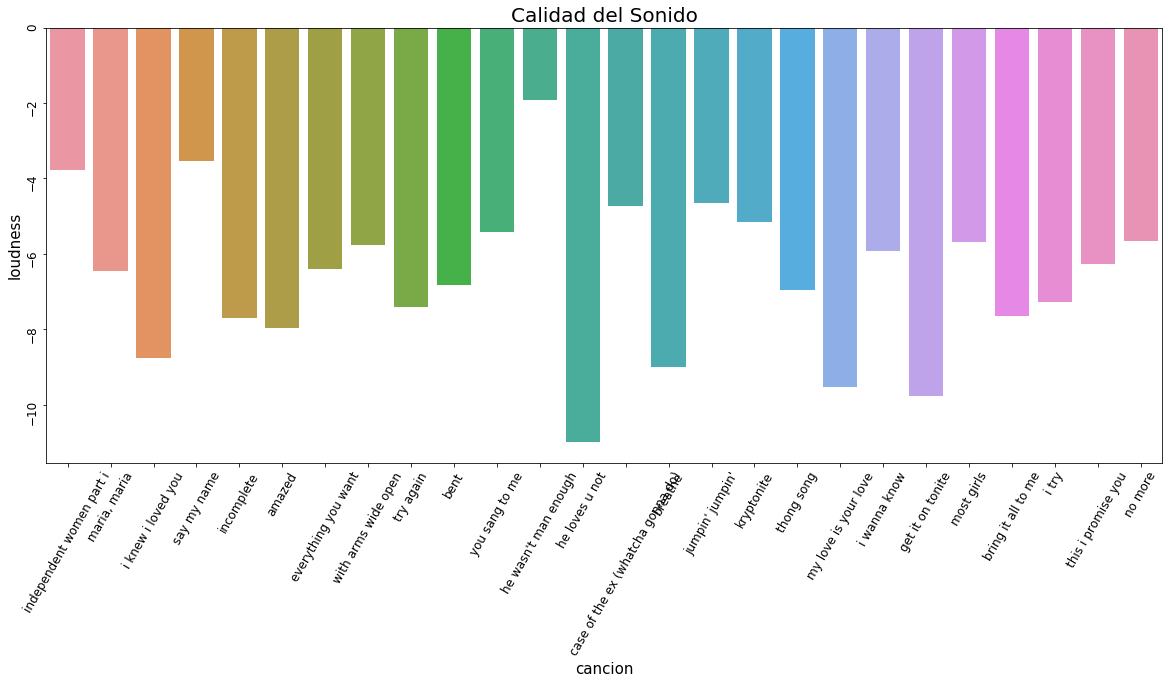

In [27]:
# Establecemos el tamaño de la figura
plt.figure(figsize=(20,8))

# Establecemos opciones de título
plt.title("Calidad del Sonido", fontsize=20)

# Establecemos título para los axis
plt.xlabel('track', fontsize=15)
plt.ylabel('calidad', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

# Inicializamos y generamos el gráfico
sns.barplot(x = data['cancion'], y = data['loudness'] );

La calidad del sonido en una pista de audio es un valor entre 0 y -60db (entendiéndose a 0 como la mejor calidad), por lo cual podriamos entender que todos los tracks que son hit en nuestro billboard2000_top5 poseen buena calidad de sonido

Ahora vamos a realizar una comparación entre las variables "danzables" y "acusticos" para entender que características tenían los temas en el año 2000

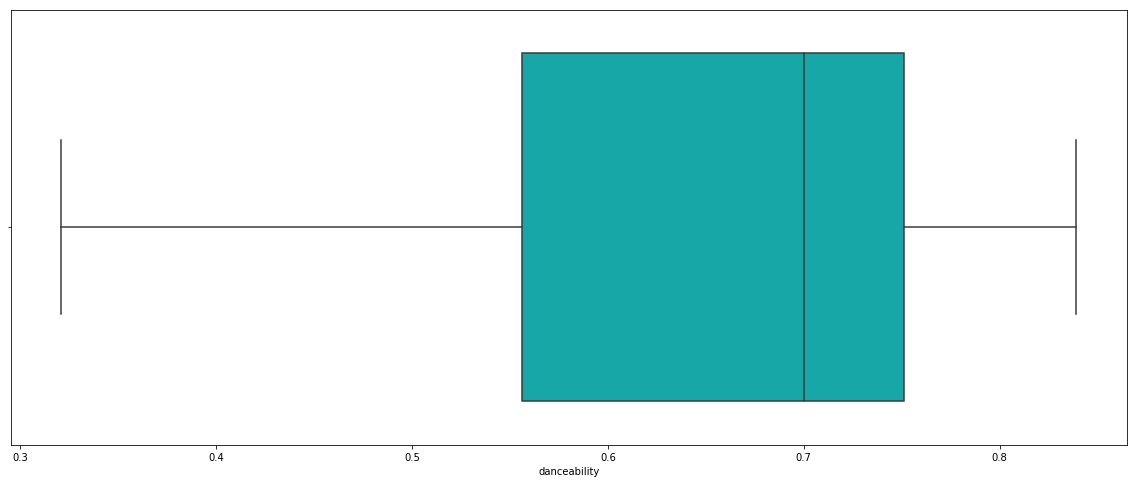

In [28]:
# Establecemos el tamaño de la figura
plt.figure(figsize=(20,8))

# Inicializamos el gráfico
sns.boxplot(x=data['danceability'], data=data, orient='h', color='c') 

# Mostramos el gráfico
plt.show()

El rango para medir si un track tiene componentes bailables (como tempo y estabilidad rítmica) se mide entre 0 y 1 con lo cual podemos inferir que los hits del año 2000 tienen un alto componente bailbale 

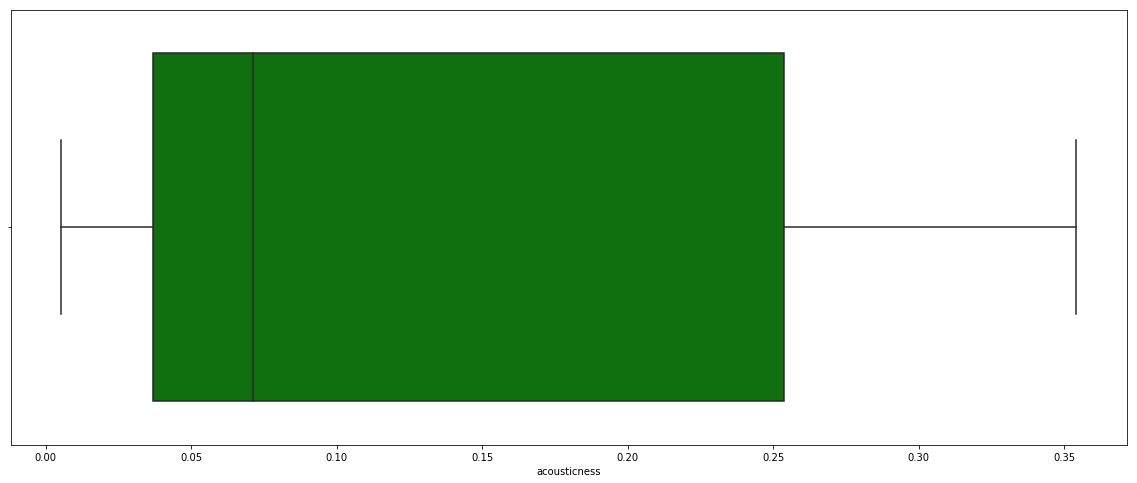

In [29]:
# Establecemos el tamaño de la figura
plt.figure(figsize=(20,8))

# Inicializamos el gráfico
sns.boxplot(x=data['acousticness'], data=data, orient='h', color='g')

# Mostramos el gráfico
plt.show()

Por el otro lado el rango de medición de los componentes acústicos de un tema oscila entre 0 y 1 con lo cual este gráfico de caja corrobora lo mencionado anteriormente

Ahora vamos a visualizar la variable correspondiente al 'habla' donde valores entre 0 y 33 representan canciones que contienen letra y música, tracks por debajo de ese valor son instrumentales y valores por encima de ese valor son prácticamente hablados, como podrían ser temas correspondientes al género rap

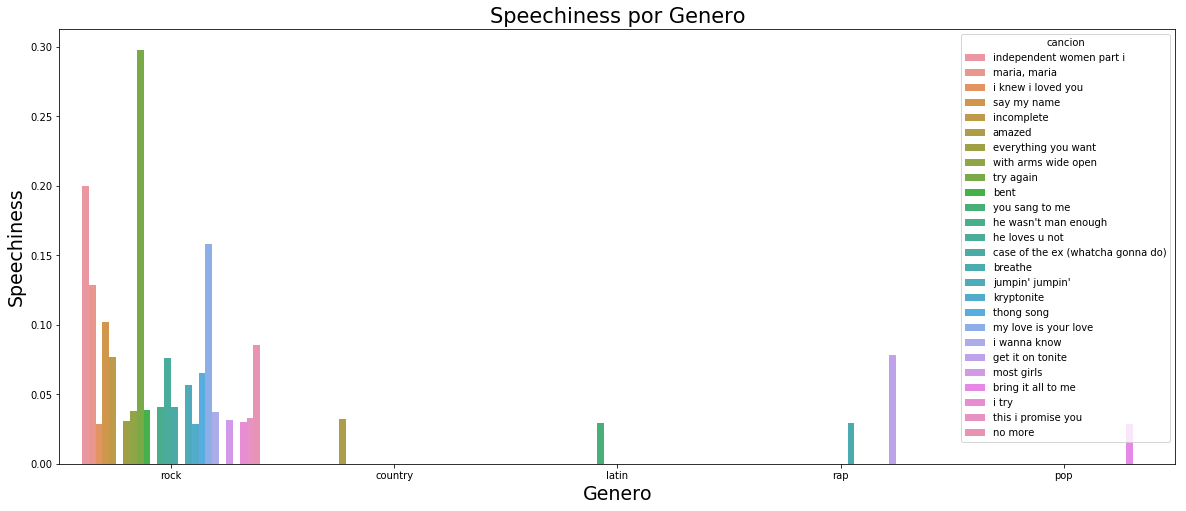

In [30]:
# Establecemos el tamaño de la figura

plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'genero', y = 'speechiness', hue = 'cancion',  data = data, ci=None);

# Agregamos el título.
plot.set_title('Speechiness por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Genero',      fontdict = {'fontsize':19})
plot.set_ylabel('Speechiness', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

Es interesante ver que el gran número de tracks corresponden a rock y el nivel de "speechiness" no supera el valor de 30 con lo cual nos estaríamos refiriendo a canciones con alto contenido instrumental lo que podria coincidir con nuestra referencia anterior a que el ranking Billboard del año 2000 fue un año marcado por los tracks "danzables"

Nos interesa ahora ver que sucede con la variable 'tempo' la que se mide en BPM (beats per minutes) y determina el ritmo del track y según investigación de la cual hacemos referencia al pie del trabajo, el mismo debe establecerse entre 59 y 146 bpm para que el track sea considerado hit.

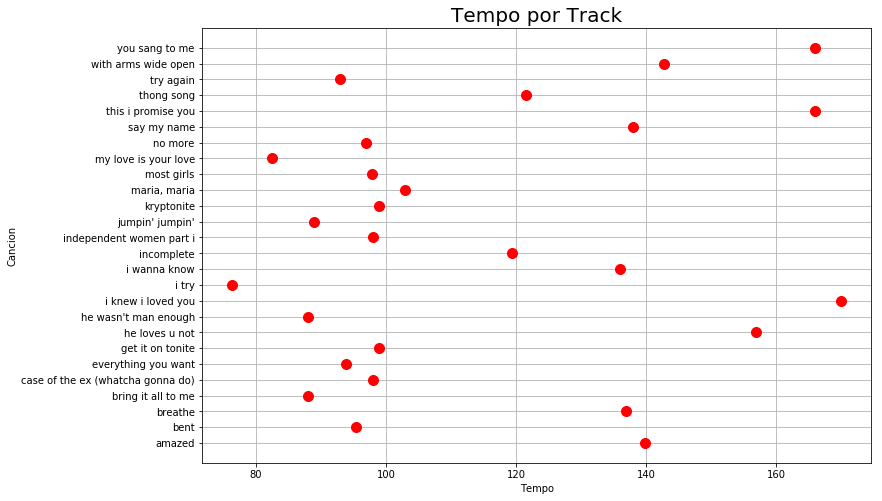

In [31]:
# Establecemos tamaño de la figura
plt.figure(figsize = (12, 8))
plt.grid()

# Aumentamos el tamaño de los puntos
plt.plot(data['tempo'], data['cancion'], 'or', markersize=10)

# Nombre eje x
plt.xlabel("Tempo")

# Nombre eje y
plt.ylabel("Cancion")

# Título del gráfico
plt.title("Tempo por Track", fontsize=20);

En relación a la variable 'valence', la misma oscila en el rango entre 0 y 1 determinando que valores altos se corresponden con estados de ánimo felices, alegres o eufóricos mientras que por el contrario valores bajos se asocian a estados de ánimo depresivos, tristes o angustiados 

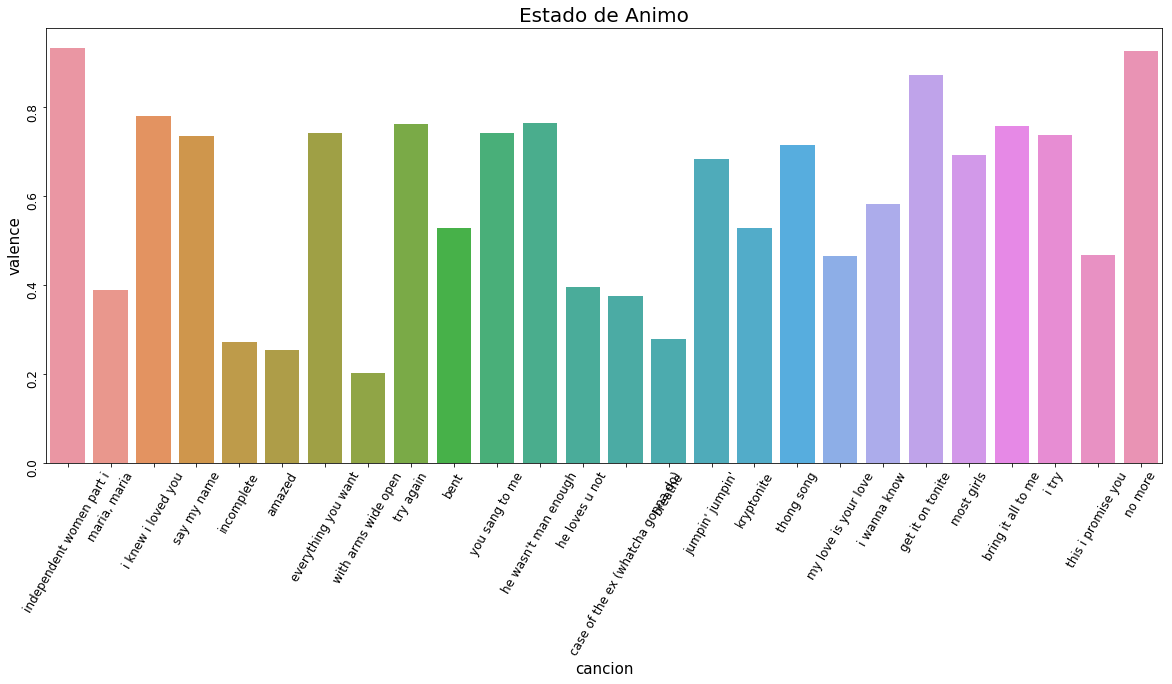

In [32]:
# Establecemos el tamaño de la figura
plt.figure(figsize=(20,8))

# Establecemos opciones de título
plt.title("Estado de Animo", fontsize=20)

# Establecemos título para los axis
plt.xlabel('track', fontsize=15)
plt.ylabel('estado de animo', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

# Inicializamos y generamos el gráfico
sns.barplot(x = data['cancion'], y = data['valence'] );

En conclusión podríamos inferir que un hit para el año 2000, tomando en cuenta solo los factores auditivos de los tracks mostrados en el ranking de la revista Billboard, era un track prácticamente bailable, de alto ritmo, relativamente poca letra, de un valence superior a la media y buena calidad de sonido. En definitiva: un tema bailable!!!

Referencia:
https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/,
http://www2.latercera.com/noticia/cual-es-el-secreto-de-las-canciones-que-se-convierten-en-hits-mundiales/

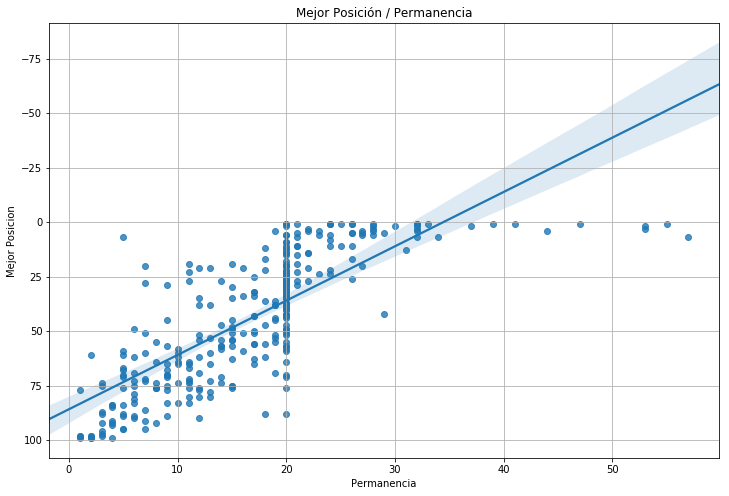

In [35]:
plt.figure(figsize = (12, 8))
plt.grid()
sns.regplot(x=billboard2000['sem_pos'], y=billboard2000['mejor_pos'], marker='o')
plt.xlabel('Permanencia')
plt.ylabel('Mejor Posicion')
plt.title('Mejor Posición / Permanencia')

# Ajustamos el eje de manera inversa
plt.gca().invert_yaxis()

En esta gráfica se observa claramente que los temas que llegan a estar mejor rankeados son los que tienen mayor permanencia